In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
tf.logging.set_verbosity(tf.logging.INFO)

%matplotlib inline
np.random.seed(1)

In [3]:
# Loading the data (MNIST)
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images  # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images  # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)
print(train_data.shape)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-u

y = 4


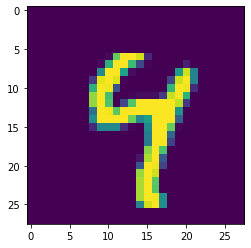

In [13]:
index = 2
plt.imshow(train_data[index].reshape(28, 28))
print ("y = " + str(np.squeeze(train_labels[index])))

In [5]:
print ("number of training examples = " + str(train_data.shape[0]))
print ("number of evaluation examples = " + str(eval_data.shape[0]))
print ("X_train shape: " + str(train_data.shape))
print ("Y_train shape: " + str(train_labels.shape))
print ("X_test shape: " + str(eval_data.shape))
print ("Y_test shape: " + str(eval_labels.shape))

number of training examples = 55000
number of evaluation examples = 10000
X_train shape: (55000, 784)
Y_train shape: (55000,)
X_test shape: (10000, 784)
Y_test shape: (10000,)


In [0]:
def cnn_model_fn(features, labels, mode):
    # Input Layer
    input_height, input_width = 28, 28
    input_channels = 1
    input_layer = tf.reshape(features["x"], [-1, input_height, input_width, input_channels])
    print(input_layer.shape)
    # Convolutional Layer #1 and Pooling Layer #1
    conv1_1 = tf.layers.conv2d(inputs=input_layer, filters=64, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    conv1_2 = tf.layers.conv2d(inputs=conv1_1, filters=64, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    pool1 = tf.layers.max_pooling2d(inputs=conv1_2, pool_size=[2, 2], strides=2, padding="same")
    
    # Convolutional Layer #2 and Pooling Layer #2
    conv2_1 = tf.layers.conv2d(inputs=pool1, filters=128, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    conv2_2 = tf.layers.conv2d(inputs=conv2_1, filters=128, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(inputs=conv2_2, pool_size=[2, 2], strides=2, padding="same")

    # Convolutional Layer #3 and Pooling Layer #3
    conv3_1 = tf.layers.conv2d(inputs=pool2, filters=256, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    conv3_2 = tf.layers.conv2d(inputs=conv3_1, filters=256, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    pool3 = tf.layers.max_pooling2d(inputs=conv3_2, pool_size=[2, 2], strides=2, padding="same")

    # Convolutional Layer #4 and Pooling Layer #4
    conv4_1 = tf.layers.conv2d(inputs=pool3, filters=512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    conv4_2 = tf.layers.conv2d(inputs=conv4_1, filters=512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    pool4 = tf.layers.max_pooling2d(inputs=conv4_2, pool_size=[2, 2], strides=2, padding="same")

    # Convolutional Layer #5 and Pooling Layer #5
    conv5_1 = tf.layers.conv2d(inputs=pool4, filters=512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    conv5_2 = tf.layers.conv2d(inputs=conv5_1, filters=512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    pool5 = tf.layers.max_pooling2d(inputs=conv5_2, pool_size=[2, 2], strides=2, padding="same")

    # FC Layers
    pool5_flat = tf.contrib.layers.flatten(pool5)
    FC1 = tf.layers.dense(inputs=pool5_flat, units=4096, activation=tf.nn.relu)
    FC2 = tf.layers.dense(inputs=FC1, units=4096, activation=tf.nn.relu)
    FC3 = tf.layers.dense(inputs=FC2, units=1000, activation=tf.nn.relu)

    """the training argument takes a boolean specifying whether or not the model is currently 
    being run in training mode; dropout will only be performed if training is true. here, 
    we check if the mode passed to our model function cnn_model_fn is train mode. """
    dropout = tf.layers.dropout(inputs=FC3, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    # Logits Layer or the output layer. which will return the raw values for our predictions.
    # Like FC layer, logits layer is another dense layer. We leave the activation function empty 
    # so we can apply the softmax
    logits = tf.layers.dense(inputs=dropout, units=10)
    
    # Then we make predictions based on raw output
    predictions = {
        # Generate predictions (for PREDICT and EVAL mode)
        # the predicted class for each example - a vlaue from 0-9
        "classes": tf.argmax(input=logits, axis=1),
        # to calculate the probablities for each target class we use the softmax
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }
    
    # so now our predictions are compiled in a dict object in python and using that we return an estimator object
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    
    '''Calculate Loss (for both TRAIN and EVAL modes): computes the softmax entropy loss. 
    This function both computes the softmax activation function as well as the resulting loss.'''
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

    # Configure the Training Options (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(loss=loss, global_step=tf.train.get_global_step())
        
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    # Add evaluation metrics (for EVAL mode)
    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(labels=labels,
                                        predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(mode=mode,
                                      loss=loss,
                                      eval_metric_ops=eval_metric_ops)

In [7]:
mnist_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn,
                                          model_dir="mnist_vgg13_model")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'mnist_vgg13_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5d91e6bf60>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": train_data},
                                                        y=train_labels,
                                                        batch_size=100,
                                                        num_epochs=100,
                                                        shuffle=True)

In [9]:
mnist_classifier.train(input_fn=train_input_fn,
                       steps=None,
                       hooks=None)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
(?, 28, 28, 1)
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op

In [10]:
eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": eval_data},
                                                   y=eval_labels,
                                                   num_epochs=1,
                                                   shuffle=False)
eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
print(eval_results)

INFO:tensorflow:Calling model_fn.
(?, 28, 28, 1)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-08T06:38:13Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from mnist_vgg13_model/model.ckpt-55000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-05-08-06:38:16
INFO:tensorflow:Saving dict for global step 55000: accuracy = 0.9803, global_step = 55000, loss = 0.061157715
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 55000: mnist_vgg13_model/model.ckpt-55000
{'accuracy': 0.9803, 'loss': 0.061157715, 'global_step': 55000}


In [17]:
eval_results = mnist_classifier.predict(input_fn=eval_input_fn)
predict = list(eval_results)
final = np.array([])
for p in predict :
  final = np.append(final, p['classes'])
print("The predicted label of index 2:")
print(final[2])

INFO:tensorflow:Calling model_fn.
(?, 28, 28, 1)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from mnist_vgg13_model/model.ckpt-55000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
The predicted label of index 2:
1.0


The Actual label of index 2 :
y = 1


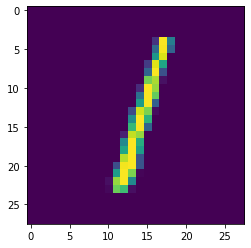

In [16]:
index = 2
plt.imshow(eval_data[index].reshape(28, 28))
print("The Actual label of index 2 :")
print ("y = " + str(np.squeeze(eval_labels[index])))